In [972]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [973]:
#Carga de base de datos
df= pd.read_csv('BergamoLimpio.csv')

In [974]:
#importamos libreria extra
%pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [975]:
#Verificamos información del DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3433 entries, 0 to 3432
Data columns (total 50 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   source                          3433 non-null   object 
 1   name                            3433 non-null   object 
 2   neighborhood_overview           3433 non-null   object 
 3   host_since                      3433 non-null   object 
 4   host_response_time              3433 non-null   object 
 5   host_is_superhost               3433 non-null   object 
 6   host_verifications              3433 non-null   object 
 7   host_has_profile_pic            3433 non-null   object 
 8   host_identity_verified          3433 non-null   object 
 9   neighbourhood_cleansed          3433 non-null   object 
 10  neighbourhood_group_cleansed    3433 non-null   object 
 11  property_type                   3433 non-null   object 
 12  room_type                       34

In [976]:
#Esneñar los primeros 5 registro del dataframe
df.head(5)

,source,name,neighborhood_overview,host_since,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,...,review_scores_communication,review_scores_location,review_scores_value,bathrooms,availability_eoy,calculated_host_listings_count,estimated_revenue_l365d,number_of_reviews_ltm,number_of_reviews,price
0,city scrape,Mo's Cozy Cabana,The cabana is just a moments walk to 'The Spli...,03/07/2010,within an hour,t,"['email', 'phone']",t,t,Belize Islands,...,4.94,4.92,4.88,1.0,159,4.0,21600.0,3.9,12.2,100.0
1,city scrape,"Seaside Villas 4 2nd Flr - Pool, Beach, Jacuzzi","Right on the beach, this building is in a prim...",19/05/2011,within an hour,Without consideration,"['email', 'phone']",t,t,Belize Islands,...,4.90,4.99,4.71,2.0,205,18.0,7808.1,10.0,12.2,706.0
2,city scrape,Valarosa - Sweet cottage,Valarosa is on Avenida Chechem in a popular re...,19/05/2011,within an hour,Without consideration,"['email', 'phone']",t,t,Belize Islands,...,4.90,4.60,4.56,1.0,262,18.0,12384.0,12.0,12.2,172.0
3,city scrape,"Toucan-kit, ac, wifi, bike, tropical gardens, ...","LOVE this area of Placencia; quiet, day & nigh...",23/06/2011,within an hour,f,"['email', 'phone']",t,f,Stann Creek Mainland,...,4.95,4.81,4.86,1.0,89,5.0,3934.0,1.0,12.2,281.0
4,city scrape,rent a private room in a house,"Quiet neighbourhood, close to shopping centre,...",23/06/2011,within a day,f,"['email', 'phone']",t,t,Cayo,...,4.69,4.62,4.77,1.0,284,1.0,624.0,2.0,13.0,52.0


10 VARÍABLES CÁTEGORICAS SELECIONADAS: 'source', 'host_response_time', 'host_is_superhost', 'room_type', 'neighbourhood_group_cleansed', 'host_has_profile_pic', 'has_availability', 'neighbourhood_cleansed', 'instant_bookable'

Obtener un análisis univariado de las variables categóricas, recordando que el objetivo es ver como se comprota esta variable sin relacionarlas con otras

                 count
source                
city scrape       2880
previous scrape    553


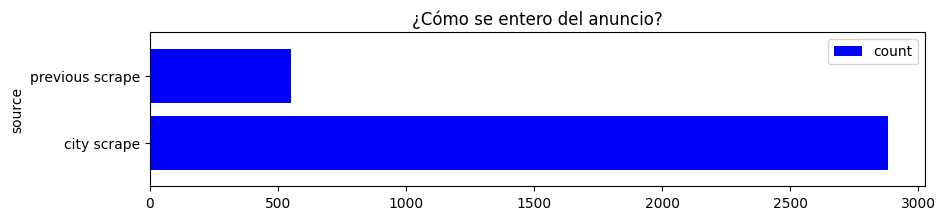

In [977]:
#Columna 'source', nos ayuda a conocer cómo se obtuvo el anuncio y evaluar posibles sesgos de datos 
#Ajustar el índice
#CONTEXTO de la columna: 'city scrape' significa que el anuncio se encontró buscando en la ciudad, mientras que 'previous scrape' significa que el anuncio se vio en otro 
#realizado en los últimos 65 días y se confirmó que el anuncio seguía disponible en el sitio web de Airbnb.

tabla1= df['source'].value_counts().reset_index().set_index('source')
print(tabla1)

#Gráfico de barras de la columna 'source'
tabla1.plot(kind = 'barh', width=0.8, figsize=(10,2), color= 'blue')
plt.title('¿Cómo se entero del anuncio?')
plt.show()

                           count
host_response_time              
within an hour              2615
No response time provided    458
within a few hours           175
within a day                 135
a few days or more            50


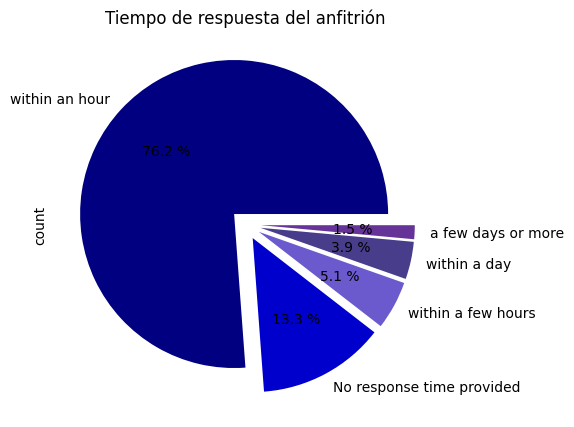

In [978]:
#Columna 'host_response_time', nos ayuda a conocer el tiempo de respuesta que tiene el anfintrión
#Ajustar el índice
#CONTEXTO de la columna: evaluá la confiabilidad del anfitrión

tabla2= df['host_response_time'].value_counts().reset_index().set_index('host_response_time')
print(tabla2)

#Realizamos grafico de pastel para la columna 'host_response_time'
colores = ['navy', 'mediumblue', 'slateblue', 'darkslateblue', 'rebeccapurple']
explode = [0.10] * len(tabla2)

tabla2['count'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%", colors= colores ,  explode=explode)
plt.title('Tiempo de respuesta del anfitrión')
plt.show()

                       count
host_is_superhost           
f                       1855
t                       1508
Without consideration     70


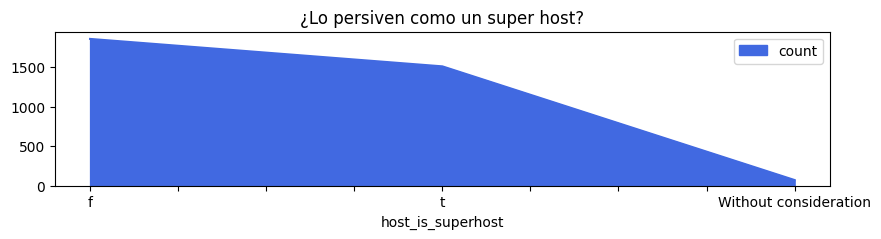

In [979]:
#Columna 'host_is_superhost', menciona si los húespedes lo persiven como un anfitrión destacado
#Ajustar el índice
#CONTEXTO de la columna: influye sobre el precio, reservas y la confiabildiad

tabla3= df['host_is_superhost'].value_counts().reset_index().set_index('host_is_superhost')
print(tabla3)

#Realizamos grafico de área
tabla3.plot(kind='area', figsize=(10,2),alpha = 1, color= 'royalblue')
plt.title('¿Lo persiven como un super host?')
plt.show()

                 count
room_type             
Entire home/apt   2414
Private room       903
Hotel room          87
Shared room         29


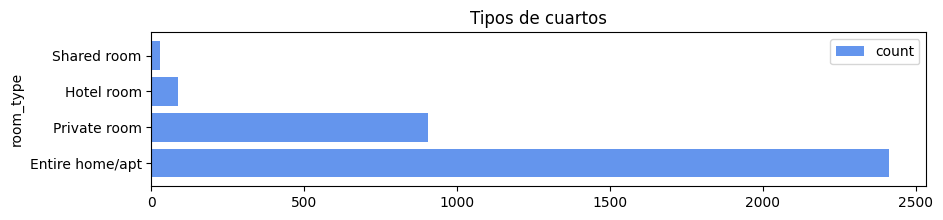

In [980]:
#Columna 'room_type', determina la privasidad y estilo de la estancia, útil para segmentar clientes
#Ajustar el índice
#CONTEXTO de la columna: se deviden en; Casa/apartamento completo | Habitación privada | Habitación compartida | Hotel 
tabla4= df['room_type'].value_counts().reset_index().set_index('room_type')
print(tabla4)

#Gráfico de barras de la columna 'source'
tabla4.plot(kind = 'barh', width=0.8, figsize=(10,2), color= 'cornflowerblue')
plt.title('Tipos de cuartos')
plt.show()


                              count
neighbourhood_group_cleansed       
Belize                         1863
Stann Creek                     797
Cayo                            602
Corozal                          84
Toledo                           44
Orange Walk                      43


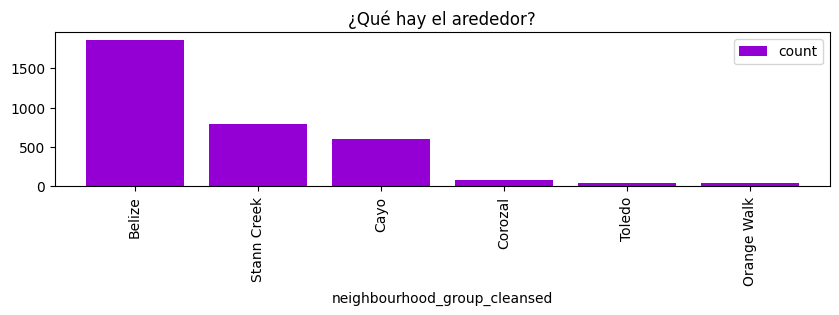

In [981]:
#Columna 'neighbourhood_group_cleansed', es una agrupación de barrios que permite análisis regional por zonas
#Ajustar el índice
#CONTEXTO de la columna: El grupo de barrios geocodificados utilizando la latitud y la longitud en comparación con los barrios definidos por archivos de forma digitales abiertos o públicos.
tabla5= df['neighbourhood_group_cleansed'].value_counts().reset_index().set_index('neighbourhood_group_cleansed')
print(tabla5) 

#Gráfico de barras de la columna 'has_availability'
tabla5.plot(kind = 'bar', width=0.8, figsize=(10,2), color= 'darkviolet')
plt.title('¿Qué hay el arededor?')
plt.show()

                        count
neighbourhood_cleansed       
Belize Islands           1504
Stann Creek Mainland      785
Cayo                      602
Belize Mainland           359
Corozal                    84
Toledo Mainland            44
Orange Walk                43
Stann Creek Islands        12


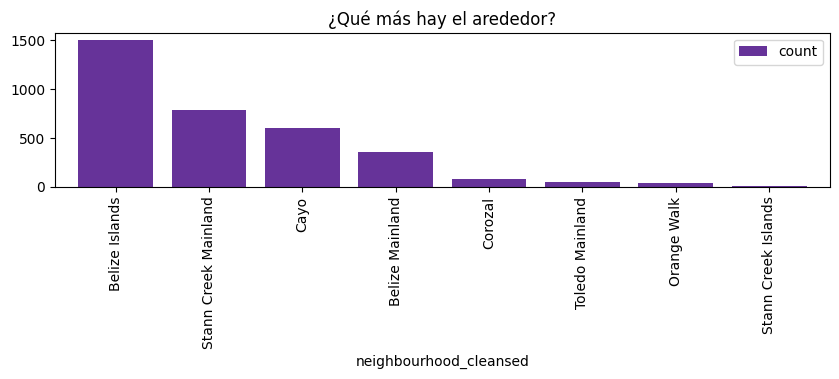

In [982]:
#Columna 'neighbourhood_cleansed', es decir, el barrio geocodificado; útil para análisis más amplio
#Ajustar el índice
#CONTEXTO de la columna: El barrio geocodificado utilizando la latitud y la longitud en relación con los barrios definidos por archivos de forma digitales abiertos o públicos.  

tabla8= df['neighbourhood_cleansed'].value_counts().reset_index().set_index('neighbourhood_cleansed')
print(tabla8)

#Gráfico de barras de la columna 'has_availability'
tabla8.plot(kind = 'bar', width=0.8, figsize=(10,2), color= 'rebeccapurple')
plt.title('¿Qué más hay el arededor?')
plt.show()

                      count
host_has_profile_pic       
t                      3343
f                        90


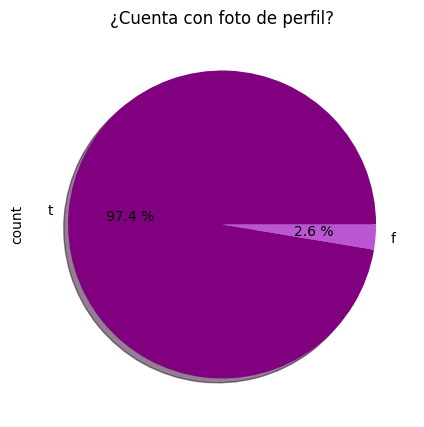

In [983]:
#Columna ''host_has_profile_pic', analsisi de confianza y profesionalismo
#Ajustar el índice
#CONTEXTO de la columna: pregunta al húesped si el anfitrión cuenta con foto de perfil

tabla6= df['host_has_profile_pic'].value_counts().reset_index().set_index('host_has_profile_pic')
print(tabla6)

#Realizamos grafico de pastel para la columna
colores = ['purple', 'mediumorchid']

tabla6['count'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%", colors=colores)
plt.title('¿Cuenta con foto de perfil?')
plt.show()
 

                  count
has_availability       
t                  3217
unknown             216


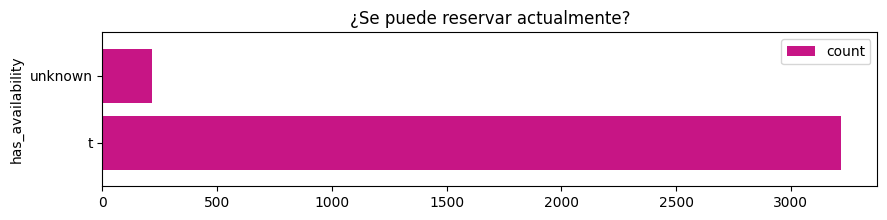

In [984]:
#Columna 'has_availability', ayuda a indicar si la propiedad puede reservarse actualmente 
#Ajustar el índice

tabla7= df['has_availability'].value_counts().reset_index().set_index('has_availability')
print(tabla7)

#Gráfico de barras de la columna 'has_availability'
tabla7.plot(kind = 'barh', width=0.8, figsize=(10,2), color= 'mediumvioletred')
plt.title('¿Se puede reservar actualmente?')
plt.show()

                        count
host_identity_verified       
t                        3126
f                         307


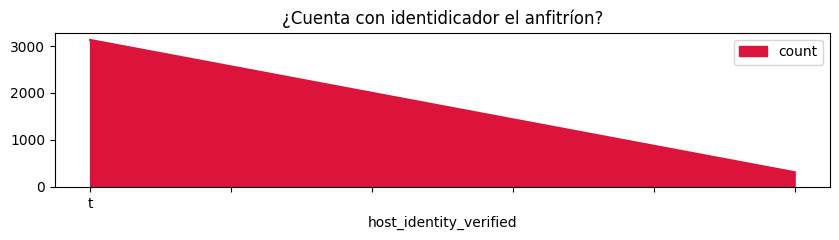

In [985]:
#Columna 'host_identity_verified', verificación de indentidor
#Ajustar el índice
#CONTEXTO: esto es un indicador de seguidad que ayuda a protejer al húesped 

tabla9= df['host_identity_verified'].value_counts().reset_index().set_index('host_identity_verified')
print(tabla9)

#Realizamos grafico de área
tabla9.plot(kind='area', figsize=(10,2),alpha = 1, color= 'crimson')
plt.title('¿Cuenta con identidicador el anfitríon?')
plt.show()

                  count
instant_bookable       
t                  2301
f                  1132


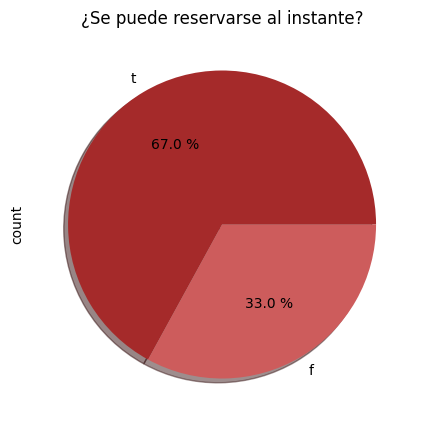

In [986]:
#Columna 'instant_bookable', facilitador en reservar al instante
#Ajustar el índice
#CONTEXTO de la columna: el huésped puede reservar automáticamente el anuncio sin que el anfitrión tenga que aceptar su solicitud de reserva, ayuda a un análsiis de conveniencia
tabla10= df['instant_bookable'].value_counts().reset_index().set_index('instant_bookable')
print(tabla10)

#Realizamos grafico de pastel para la columna 'host_response_time'
colores=['brown', 'indianred']
tabla10['count'].plot(kind='pie', figsize=(10,5), shadow=True, autopct="%0.1f %%", colors=colores)
plt.title('¿Se puede reservarse al instante?')
plt.show()
 

CATEGORIZAR LAS SIGUENTES VARIABLES APLICANDO REGLA DE STURGES

In [987]:
#Aseguramos que las variables esten en el df

# Lista de variables que nos indico la actividad: 
variables = [
    'host_response_rate',
    'host_acceptance_rate',
    'host_total_listings_count',
    'accommodates',
    'bathrooms_text',
    'beds',
    'price',
    'maximum_nights_avg_ntm',
    'availability_365',
    'number_of_reviews',
    'review_scores_value',
    'reviews_per_month'
]

# Revisar qué columnas están en df
presentes = [col for col in variables if col in df.columns]
faltantes = [col for col in variables if col not in df.columns]

print(presentes)
print(faltantes)


['host_response_rate', 'accommodates', 'beds', 'price', 'availability_365', 'number_of_reviews', 'review_scores_value']
['host_acceptance_rate', 'host_total_listings_count', 'bathrooms_text', 'maximum_nights_avg_ntm', 'reviews_per_month']


In [988]:
#Extraemos variables faltantes del df original 
df_original = pd.read_csv('listings.csv')

#Copiar columnas faltantes
dfo = df_original[['host_acceptance_rate', 'host_total_listings_count', 'bathrooms_text', 'maximum_nights_avg_ntm', 'reviews_per_month']]
dfo.head(3)

,host_acceptance_rate,host_total_listings_count,bathrooms_text,maximum_nights_avg_ntm,reviews_per_month
0,89%,5,1 bath,60.0,2.59
1,100%,20,2 baths,730.0,0.75
2,100%,20,1 bath,1125.0,0.79


In [989]:
#Verificar tipo de datos de la copia
dfo.dtypes

host_acceptance_rate          object
host_total_listings_count      int64
bathrooms_text                object
maximum_nights_avg_ntm       float64
reviews_per_month            float64
dtype: object

In [990]:
#Verificación de NA's
dfo.isnull().sum()

host_acceptance_rate         381
host_total_listings_count      0
bathrooms_text                 7
maximum_nights_avg_ntm         0
reviews_per_month            649
dtype: int64

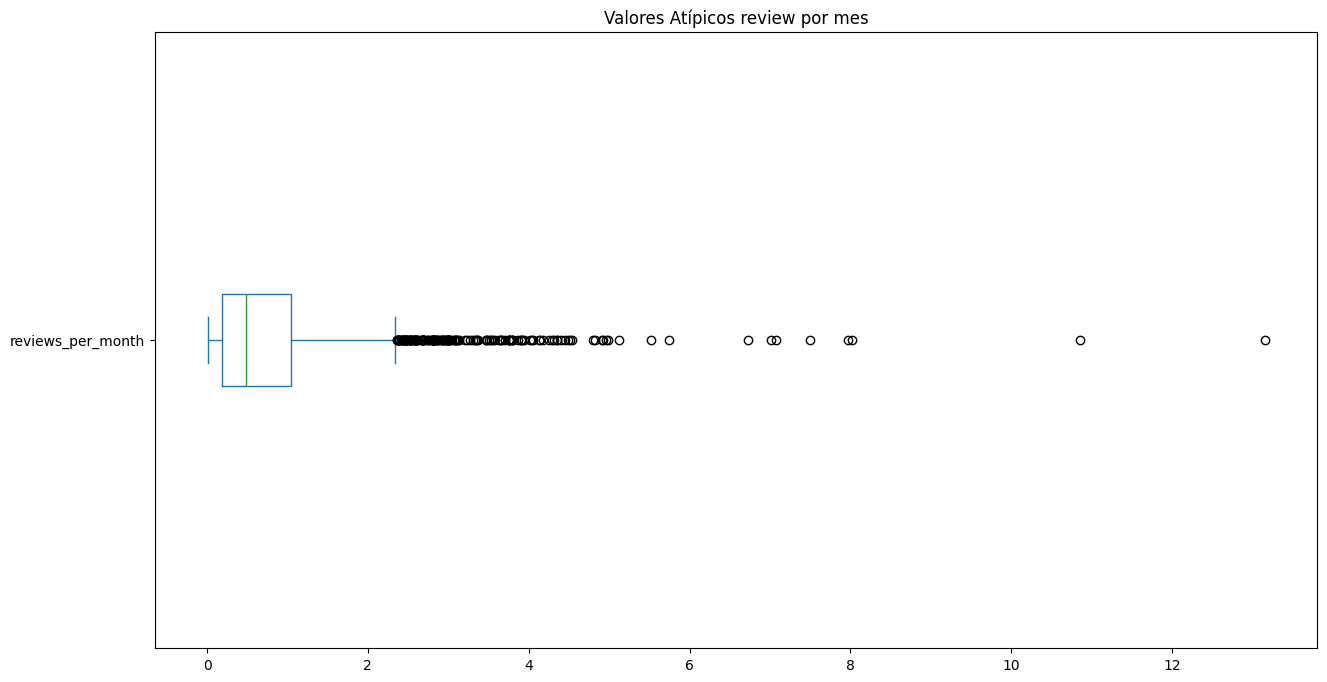

In [991]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
dfo['reviews_per_month'].plot(kind='box', vert=False)
plt.title("Valores Atípicos review por mes")
plt.show()

In [992]:
#Aplicación de sustitucion por mediana
df_o = dfo[['reviews_per_month']]
df_o['reviews_per_month'] = df_o['reviews_per_month'].fillna(df_o['reviews_per_month'].median())

df_o['reviews_per_month'].isnull().sum()

C:\Users\vbece\AppData\Local\Temp\ipykernel_20256\3064018339.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_o['reviews_per_month'] = df_o['reviews_per_month'].fillna(df_o['reviews_per_month'].median())


np.int64(0)

In [993]:
# Lista de valores únicos 
print(dfo['bathrooms_text'].unique())
#Sustitución de valore snulos con una valor en especifico 
dfo['bathrooms_text'] = dfo['bathrooms_text'].fillna('not specified')

['1 bath' '2 baths' '1 private bath' '1 shared bath' '5 baths' '2.5 baths'
 '3 baths' '3.5 baths' '6 baths' '4 baths' '2 shared baths' '8 baths'
 '13 baths' '1.5 baths' '4.5 baths' '0 shared baths' '6.5 baths'
 '6 shared baths' '0 baths' nan '1.5 shared baths' '7 baths' '11 baths'
 '5.5 baths' '10 baths' '4 shared baths' '5 shared baths' 'Half-bath'
 '7.5 baths' '8 shared baths' '9 shared baths' '12 baths' '9.5 baths'
 '9 baths' '3 shared baths' '20 baths' '4.5 shared baths'
 'Private half-bath']


C:\Users\vbece\AppData\Local\Temp\ipykernel_20256\1968332388.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfo['bathrooms_text'] = dfo['bathrooms_text'].fillna('not specified')


In [994]:
# Lista de valores únicos 
print(dfo['host_acceptance_rate'].unique())

#Sustitución de valore snulos con una valor en especifico 
dfo['host_acceptance_rate'] = dfo['host_acceptance_rate'].fillna('not specified')

['89%' '100%' '96%' '29%' '95%' '67%' '98%' '0%' nan '99%' '93%' '84%'
 '92%' '83%' '16%' '44%' '75%' '91%' '81%' '97%' '94%' '70%' '86%' '85%'
 '88%' '90%' '8%' '80%' '33%' '63%' '40%' '55%' '15%' '41%' '73%' '25%'
 '71%' '56%' '65%' '50%' '82%' '60%' '78%' '52%']


C:\Users\vbece\AppData\Local\Temp\ipykernel_20256\4049336745.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfo['host_acceptance_rate'] = dfo['host_acceptance_rate'].fillna('not specified')


In [995]:
#Verificación de valores nulos
dfo.isnull().sum()

host_acceptance_rate           0
host_total_listings_count      0
bathrooms_text                 0
maximum_nights_avg_ntm         0
reviews_per_month            649
dtype: int64

In [996]:
#Aplicación de método de desviasión estandar en columna 'reviews_per_month', gracias a que aun existen outliers
desviasion = dfo['reviews_per_month']
y = desviasion 
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido 3.5735141997999667
Limite inferior permitido -1.9847570158919203


In [997]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data= desviasion[(y<=Limite_Superior)&(y>=Limite_Inferior)]

data.isnull().sum()

np.int64(0)

In [998]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data1=data.copy()
data1=data1.fillna(data.mean())
data1.isnull().sum()

np.int64(0)

In [999]:
#Unimos los data frame ya con los valores limpios, es decir crear un dataframe con las columnas presentes + restantes
estan = df[['host_response_rate', 'accommodates', 'beds', 'price', 'availability_365', 'number_of_reviews', 'review_scores_value']]
Noestaban = dfo[['bathrooms_text', 'host_acceptance_rate', 'host_total_listings_count', 'maximum_nights_avg_ntm']]
df1 = pd.concat([estan, Noestaban, data1], axis=1)
df1

,host_response_rate,accommodates,beds,price,availability_365,number_of_reviews,review_scores_value,bathrooms_text,host_acceptance_rate,host_total_listings_count,maximum_nights_avg_ntm,reviews_per_month
0,100,2,1,100.0,227,12.2,4.88,1 bath,89%,5,6.000000e+01,2.59
1,100,6,2,706.0,281,12.2,4.71,2 baths,100%,20,7.300000e+02,0.75
2,100,2,1,172.0,315,12.2,4.56,1 bath,100%,20,1.125000e+03,0.79
3,100,2,1,281.0,89,12.2,4.86,1 bath,96%,10,1.125000e+03,0.45
4,67,1,1,52.0,365,13.0,4.77,1 private bath,29%,1,7.300000e+02,0.12
5,100,2,2,495.7,274,44.0,4.52,1 shared bath,100%,8,1.125000e+03,0.33
6,100,4,2,246.0,236,12.2,4.60,1 bath,100%,8,1.125000e+03,0.87
7,100,4,3,181.0,352,12.2,4.66,1 bath,95%,4,3.650000e+02,0.98
8,100,3,2,184.0,353,12.2,4.81,1 bath,95%,4,3.650000e+02,1.19
9,100,2,1,232.0,362,15.0,4.86,1 private bath,100%,1,1.125000e+03,0.12


In [1000]:
#Asegurarnos que no tengan valores nulos 
df1.isnull().sum()

host_response_rate             0
accommodates                   0
beds                           0
price                          0
availability_365               0
number_of_reviews              0
review_scores_value            0
bathrooms_text                 0
host_acceptance_rate           0
host_total_listings_count      0
maximum_nights_avg_ntm         0
reviews_per_month            701
dtype: int64

In [1001]:
#Al ser positivo y ver que la columna de 'reviews_per_month' sigue marcando valores nulos despues de aplciar la desviasión estandar, se decidio aplicar el primer flitro en la copia de ese primer df 
#Unimos los data frame ya con los valores limpios, es decir crear un dataframe con las columnas presentes + restantes
estan = df[['host_response_rate', 'accommodates', 'beds', 'price', 'availability_365', 'number_of_reviews', 'review_scores_value']]
Noestaban = dfo[['bathrooms_text', 'host_acceptance_rate', 'host_total_listings_count', 'maximum_nights_avg_ntm']]
media = df_o[['reviews_per_month']]
dfL = pd.concat([estan, Noestaban, media], axis=1)
dfL.isnull().sum()

host_response_rate           0
accommodates                 0
beds                         0
price                        0
availability_365             0
number_of_reviews            0
review_scores_value          0
bathrooms_text               0
host_acceptance_rate         0
host_total_listings_count    0
maximum_nights_avg_ntm       0
reviews_per_month            0
dtype: int64

ANALISIS UNIVARIADO DE LAS COLUMNAS PROPROCIONADAS

                    count
host_response_rate       
100                  2885
98                    221
90                     75
99                     35
0                      30
91                     29
80                     26
89                     24
97                     14


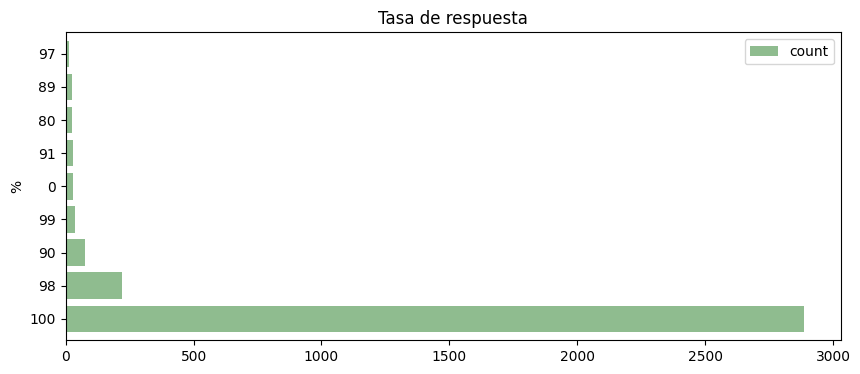

In [1002]:
#CONTEXTO DE LA COLUMNA: Es la tasa de respuesta que tienen el anfitrión con el húesped
#Ánalisis univariado de las variables categoricas: 
freq1= dfL['host_response_rate'].value_counts(). reset_index()

#Filtro de los valores más relevantes de la variable categorica seleccionada
filtroA = freq1[freq1['count']>=12]

#Ajuste del índice
index1 = filtroA.set_index('host_response_rate')
print(index1)


#Gráfico de barras
index1.plot(kind='barh', width = 0.8, figsize = (10, 4), color = 'darkseagreen')
plt.title('Tasa de respuesta')
plt.ylabel('%')
plt.show()

                      count
host_acceptance_rate       
71%                      16
92%                      18
67%                      19
75%                      20
94%                      43
0%                       46
97%                      49
93%                      50
95%                      52
96%                      94
98%                     100
not specified           381
99%                     467
100%                   1901


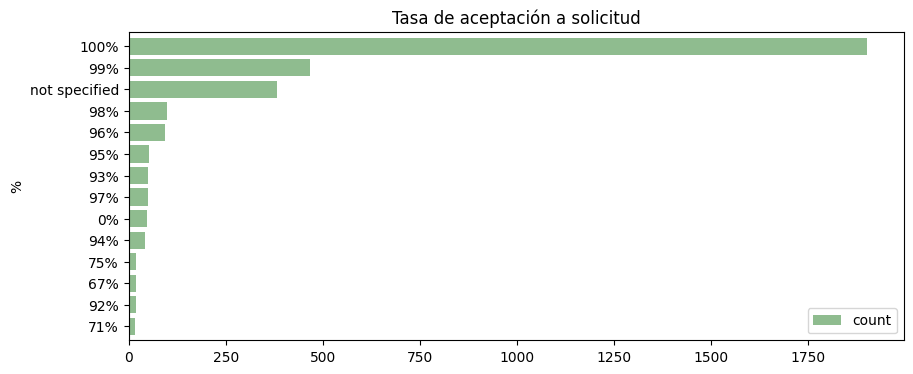

In [1003]:
#CONTEXTO DE LA COLUMNA: Es la tasa a la que el anfitrión acepta solicitudes de reserva.
#Ánalisis univariado de las variables categoricas: 
freq2= dfL['host_acceptance_rate'].value_counts(). reset_index()

#Filtro de los valores más relevantes de la variable categorica seleccionada
filtroB = freq2[freq2['count']>=16].sort_values(by='count', ascending=True)

#Ajuste del índice
index2 = filtroB.set_index('host_acceptance_rate')
print(index2)

#Gráfico de barras
index2.plot(kind='barh', width = 0.8, figsize = (10, 4), color = 'darkseagreen')
plt.title('Tasa de aceptación a solicitud')
plt.ylabel('%')
plt.show()

                           count
host_total_listings_count       
1                            332
2                            277
3                            261
4                            252
5                            238
264                          204
6                            172
8                            162
7                            145
10                           121
9                            109
12                           101
142                           99
67                            93
11                            91


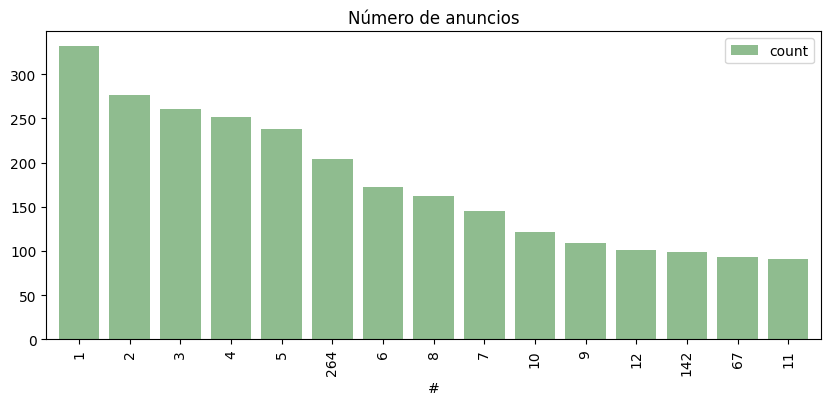

In [1004]:
#CONTEXTO DE LA COLUMNA: Es el número de anuncios que tiene el anfitrión (según cálculos desconocidos de Airbnb).
#Ánalisis univariado de las variables categoricas: 
freq3= dfL['host_total_listings_count'].value_counts(). reset_index()

#Filtro de los valores más relevantes de la variable categorica seleccionada
filtroC = freq3[freq3['count']>=91]

#Ajuste del índice
index3 = filtroC.set_index('host_total_listings_count')
print(index3)

#Gráfico de barras
index3.plot(kind='bar', width = 0.8, figsize = (10, 4), color = 'darkseagreen')
plt.title('Número de anuncios')
plt.xlabel('#')
plt.show()

              count
accommodates       
2              1229
4               782
6               452
3               319
8               203
5               146
10               80


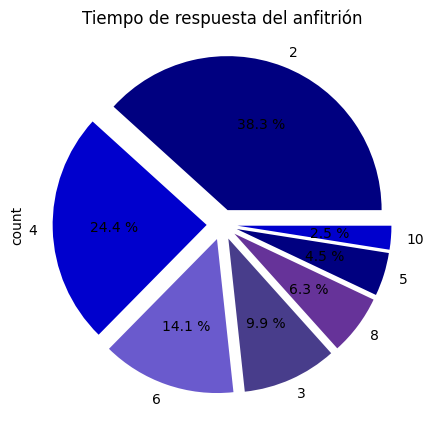

In [1005]:
#CONTEXTO DE LA COLUMNA: Es la capacidad máxima del anuncio
#Ánalisis univariado de las variables categoricas: 
freq4= dfL['accommodates'].value_counts(). reset_index()

#Filtro de los valores más relevantes de la variable categorica seleccionada
filtroC = freq4[freq4['count']>=80]

#Ajuste del índice
index4 = filtroC.set_index('accommodates')
print(index4)

#Realizamos grafico de pastel para la columna 'host_response_time'
colores = ['navy', 'mediumblue', 'slateblue', 'darkslateblue', 'rebeccapurple']
explode = [0.10] * len(index4)

index4['count'].plot(kind='pie', figsize=(10,5), autopct="%0.1f %%", colors= colores ,  explode=explode)
plt.title('Tiempo de respuesta del anfitrión')
plt.show()


                count
bathrooms_text       
1 bath           1381
2 baths           635
1 private bath    603
3 baths           189
1 shared bath     176
2.5 baths          73
4 baths            72
1.5 baths          67
3.5 baths          41
5 baths            31
4.5 baths          29


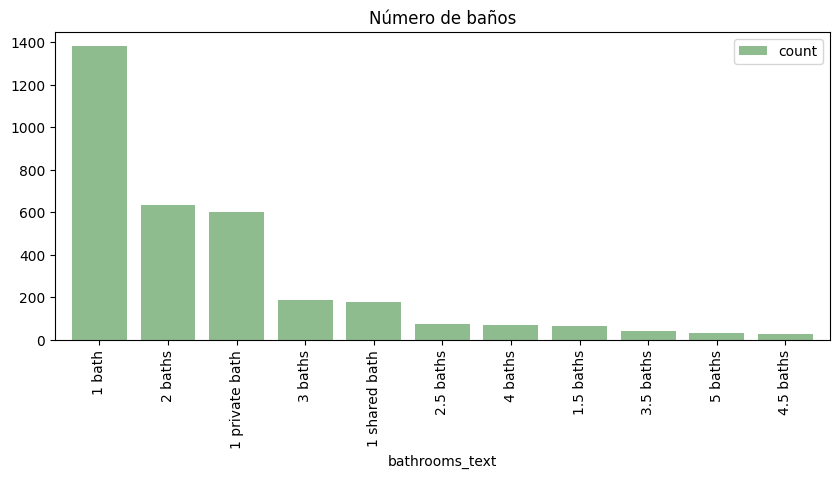

In [1006]:
#CONTEXTO DE LA COLUMNA: Es el número de baños del anuncio, , el campo de los baños ha pasado de ser un número a una descripción textual (para los anuncios más antiguos)
#Ánalisis univariado de las variables categoricas: 
freq5= dfL['bathrooms_text'].value_counts(). reset_index()

#Filtro de los valores más relevantes de la variable categorica seleccionada
filtroD = freq5[freq5['count']>=29]

#Ajuste del índice
index5 = filtroD.set_index('bathrooms_text')
print(index5)

#Gráfico de barras
index5.plot(kind='bar', width = 0.8, figsize = (10, 4), color = 'darkseagreen')
plt.title('Número de baños')
plt.show()

      count
beds       
2      1401
1       989
3       425
4       234
5       128
6       101
0        38
8        36
7        26
9        21


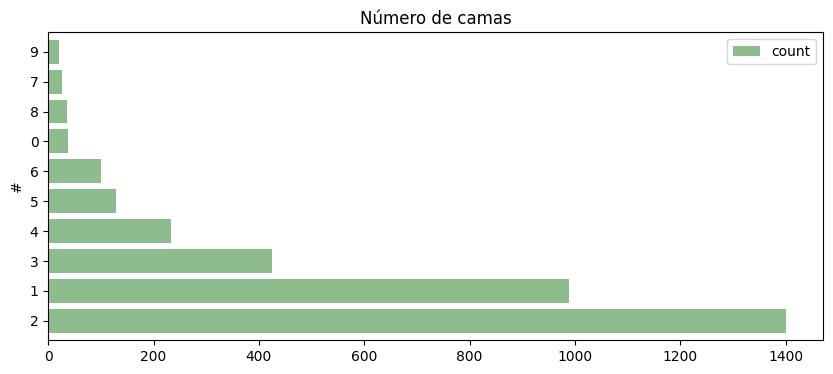

In [1007]:
#CONTEXTO DE LA COLUMNA: Es el número de camas, importante para estimar ocupación máxima y tipo de huéspedes.
#Ánalisis univariado de las variables categoricas: 
freq6= dfL['beds'].value_counts(). reset_index()

#Filtro de los valores más relevantes de la variable categorica seleccionada
filtroE = freq6[freq6['count']>=21]

#Ajuste del índice
index6 = filtroE.set_index('beds')
print(index6)

#Gráfico de barras
index6.plot(kind='barh', width = 0.8, figsize = (10, 4), color = 'darkseagreen')
plt.title('Número de camas')
plt.ylabel('#')
plt.show()

       count
price       
495.7    553
364.3    324
252.0     26
757.0     24
172.0     22
242.0     21
227.0     20
154.0     18
200.0     18


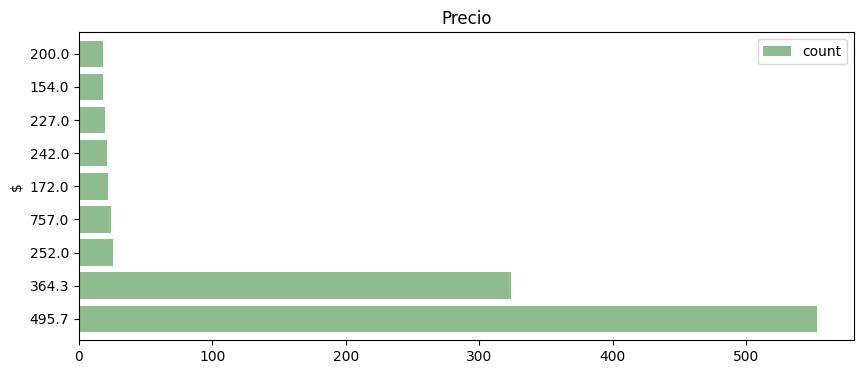

In [1008]:
#CONTEXTO DE LA COLUMNA: Es el número de camas, importante para estimar ocupación máxima y tipo de huéspedes.
#Ánalisis univariado de las variables categoricas: 
freq7= dfL['price'].value_counts(). reset_index()

#Filtro de los valores más relevantes de la variable categorica seleccionada
filtroF = freq7[freq7['count']>=18]

#Ajuste del índice
index7 = filtroF.set_index('price')
print(index7)

#Gráfico de barras
index7.plot(kind='barh', width = 0.8, figsize = (10, 4), color = 'darkseagreen')
plt.title('Precio')
plt.ylabel('$')
plt.show()

                        count
maximum_nights_avg_ntm       
1125.0                   1395
365.0                     911
30.0                      174
90.0                       41
28.0                       41
14.0                       36
60.0                       27


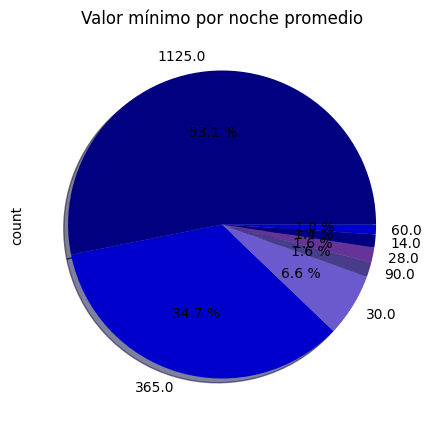

In [1009]:
#CONTEXTO DE LA COLUMNA: El valor mínimo noche promedio del calendario (mirando 365 noches hacia el futuro)
#Ánalisis univariado de las variables categoricas: 
freq8= dfL['maximum_nights_avg_ntm'].value_counts().reset_index()

#Filtro de los valores más relevantes de la variable categorica seleccionada
filtroG = freq8[freq8['count']>=27]

#Ajuste del índice
index8 = filtroG.set_index('maximum_nights_avg_ntm')
print(index8)

#Realizamos grafico de pastel para la columna 'host_response_time'
colores = ['navy', 'mediumblue', 'slateblue', 'darkslateblue', 'rebeccapurple']

index8['count'].plot(kind='pie', shadow = True, figsize=(10,5), autopct="%0.1f %%", colors= colores)
plt.title('Valor mínimo por noche promedio')
plt.show()

DETERMINACIÓN DE CLASES PARA DATOS AGRUPADOS

In [1010]:
# Ajustar maximo de filas
#pd.options.display.max_rows = None

In [1011]:
#Corroboramos valores nulos
dfL.isnull().sum()

host_response_rate           0
accommodates                 0
beds                         0
price                        0
availability_365             0
number_of_reviews            0
review_scores_value          0
bathrooms_text               0
host_acceptance_rate         0
host_total_listings_count    0
maximum_nights_avg_ntm       0
reviews_per_month            0
dtype: int64

In [1012]:
#Corroboramos carácteristicas del dfL
dfL.dtypes

host_response_rate             int64
accommodates                   int64
beds                           int64
price                        float64
availability_365               int64
number_of_reviews            float64
review_scores_value          float64
bathrooms_text                object
host_acceptance_rate          object
host_total_listings_count      int64
maximum_nights_avg_ntm       float64
reviews_per_month            float64
dtype: object

In [1013]:
#Calculamos el numero total de la población "n"
dfL['host_total_listings_count'].info()
n=3433

#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dfL['host_total_listings_count'].max()
Min=dfL['host_total_listings_count'].min()
Limites= [Min, Max]
print('Estos son los límites:', Limites)

#Calculamos el rango R
R=Max-Min
print('çalculo de r:', R)

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print('calculo de número de intervalos:', ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
print('ancho de intervalo:', i)

#Declaramos intervalos
intervalos1=np.linspace(1, 2573, 13)

#Creamos las categorías 
categorias1= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría", "Categoría10", "Categoría11", "Categoría12"]

<class 'pandas.core.series.Series'>
RangeIndex: 3433 entries, 0 to 3432
Series name: host_total_listings_count
Non-Null Count  Dtype
--------------  -----
3433 non-null   int64
dtypes: int64(1)
memory usage: 26.9 KB
Estos son los límites: [np.int64(1), np.int64(2572)]
çalculo de r: 2571
calculo de número de intervalos: 12.73843702737349
ancho de intervalo: 201.83009850228925


In [1014]:
#Calculamos el numero total de la población "n"
dfL['accommodates'].info()
n=3433

#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dfL['accommodates'].max()
Min=dfL['accommodates'].min()
Limites= [Min, Max]
print('Estos son los límites:', Limites)

#Calculamos el rango R
R=Max-Min
print('çalculo de r:', R)

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print('calculo de número de intervalos:', ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
print('ancho de intervalo:', i)

#Declaramos intervalos
intervalos2=np.linspace(0.5, 17, 13)

#Creamos las categorías 
categorias2= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría", "Categoría10", "Categoría11", "Categoría12"]

<class 'pandas.core.series.Series'>
RangeIndex: 3433 entries, 0 to 3432
Series name: accommodates
Non-Null Count  Dtype
--------------  -----
3433 non-null   int64
dtypes: int64(1)
memory usage: 26.9 KB
Estos son los límites: [np.int64(1), np.int64(16)]
çalculo de r: 15
calculo de número de intervalos: 12.73843702737349
ancho de intervalo: 1.177538497679634


In [1015]:
#Calculamos el numero total de la población "n"
dfL['beds'].info()
n=3433

#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dfL['beds'].max()
Min=dfL['beds'].min()
Limites= [Min, Max]
print('Estos son los límites:', Limites)

#Calculamos el rango R
R=Max-Min
print('çalculo de r:', R)

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print('calculo de número de intervalos:', ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
print('ancho de intervalo:', i)

#Declaramos intervalos
intervalos3=np.linspace(0, 29, 13)

#Creamos las categorías 
categorias3= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría", "Categoría10", "Categoría11", "Categoría12"]

<class 'pandas.core.series.Series'>
RangeIndex: 3433 entries, 0 to 3432
Series name: beds
Non-Null Count  Dtype
--------------  -----
3433 non-null   int64
dtypes: int64(1)
memory usage: 26.9 KB
Estos son los límites: [np.int64(0), np.int64(28)]
çalculo de r: 28
calculo de número de intervalos: 12.73843702737349
ancho de intervalo: 2.1980718623353166


In [1016]:
#Calculamos el numero total de la población "n"
dfL['price'].info()
n=3433

#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dfL['price'].max()
Min=dfL['price'].min()
Limites= [Min, Max]
print('Estos son los límites:', Limites)

#Calculamos el rango R
R=Max-Min
print('çalculo de r:', R)

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print('calculo de número de intervalos:', ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
print('ancho de intervalo:', i)

#Declaramos intervalos
intervalos4=np.linspace(15, 949, 13)

#Creamos las categorías 
categorias4= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría", "Categoría10", "Categoría11", "Categoría12"]


<class 'pandas.core.series.Series'>
RangeIndex: 3433 entries, 0 to 3432
Series name: price
Non-Null Count  Dtype  
--------------  -----  
3433 non-null   float64
dtypes: float64(1)
memory usage: 26.9 KB
Estos son los límites: [np.float64(16.0), np.float64(948.0)]
çalculo de r: 932.0
calculo de número de intervalos: 12.73843702737349
ancho de intervalo: 73.16439198916125


In [1017]:
#Calculamos el numero total de la población "n"
dfL['maximum_nights_avg_ntm'].info()
n=3433

#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dfL['maximum_nights_avg_ntm'].max()
Min=dfL['maximum_nights_avg_ntm'].min()
Limites= [Min, Max]
print('Estos son los límites:', Limites)

#Calculamos el rango R
R=Max-Min
print('çalculo de r:', R)

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print('calculo de número de intervalos:', ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
print('ancho de intervalo:', i)

#Declaramos intervalos
intervalos5=np.linspace(0.5, 2147483648, 13)

#Creamos las categorías 
categorias5= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría", "Categoría10", "Categoría11", "Categoría12"]



<class 'pandas.core.series.Series'>
RangeIndex: 3433 entries, 0 to 3432
Series name: maximum_nights_avg_ntm
Non-Null Count  Dtype  
--------------  -----  
3433 non-null   float64
dtypes: float64(1)
memory usage: 26.9 KB
Estos son los límites: [np.float64(1.0), np.float64(2147483647.0)]
çalculo de r: 2147483646.0
calculo de número de intervalos: 12.73843702737349
ancho de intervalo: 168582977.75349486


In [1018]:
#Calculamos el numero total de la población "n"
dfL['availability_365'].info()
n=3433

#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dfL['availability_365'].max()
Min=dfL['availability_365'].min()
Limites= [Min, Max]
print('Estos son los límites:', Limites)

#Calculamos el rango R
R=Max-Min
print('çalculo de r:', R)

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print('calculo de número de intervalos:', ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
print('ancho de intervalo:', i)

#Declaramos intervalos
intervalos6=np.linspace(0.5, 36, 13)

#Creamos las categorías 
categorias6= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría", "Categoría10", "Categoría11", "Categoría12"]


<class 'pandas.core.series.Series'>
RangeIndex: 3433 entries, 0 to 3432
Series name: availability_365
Non-Null Count  Dtype
--------------  -----
3433 non-null   int64
dtypes: int64(1)
memory usage: 26.9 KB
Estos son los límites: [np.int64(0), np.int64(365)]
çalculo de r: 365
calculo de número de intervalos: 12.73843702737349
ancho de intervalo: 28.65343677687109


In [1019]:
#Calculamos el numero total de la población "n"
dfL['number_of_reviews'].info()
n=3433

#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dfL['number_of_reviews'].max()
Min=dfL['number_of_reviews'].min()
Limites= [Min, Max]
print('Estos son los límites:', Limites)

#Calculamos el rango R
R=Max-Min
print('çalculo de r:', R)

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print('calculo de número de intervalos:', ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
print('ancho de intervalo:', i)

#Declaramos intervalos
intervalos7=np.linspace(0.000, 67, 13)

#Creamos las categorías 
categorias7= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría", "Categoría10", "Categoría11", "Categoría12"]

<class 'pandas.core.series.Series'>
RangeIndex: 3433 entries, 0 to 3432
Series name: number_of_reviews
Non-Null Count  Dtype  
--------------  -----  
3433 non-null   float64
dtypes: float64(1)
memory usage: 26.9 KB
Estos son los límites: [np.float64(0.0), np.float64(66.0)]
çalculo de r: 66.0
calculo de número de intervalos: 12.73843702737349
ancho de intervalo: 5.181169389790389


In [1020]:
#Calculamos el numero total de la población "n"
dfL['review_scores_value'].info()
n=3433

#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dfL['review_scores_value'].max()
Min=dfL['review_scores_value'].min()
Limites= [Min, Max]
print('Estos son los límites:', Limites)

#Calculamos el rango R
R=Max-Min
print('çalculo de r:', R)

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print('calculo de número de intervalos:', ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
print('ancho de intervalo:', i)

#Declaramos intervalos
intervalos8=np.linspace(0.5, 6, 13)

#Creamos las categorías 
categorias8= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría", "Categoría10", "Categoría11", "Categoría12"]

<class 'pandas.core.series.Series'>
RangeIndex: 3433 entries, 0 to 3432
Series name: review_scores_value
Non-Null Count  Dtype  
--------------  -----  
3433 non-null   float64
dtypes: float64(1)
memory usage: 26.9 KB
Estos son los límites: [np.float64(1.0), np.float64(5.0)]
çalculo de r: 4.0
calculo de número de intervalos: 12.73843702737349
ancho de intervalo: 0.3140102660479024


In [1021]:
#Calculamos el numero total de la población "n"
dfL['reviews_per_month'].info()
n=3433

#Obtenemos el limite superior y el límite inferior de la columna objetivo
Max=dfL['reviews_per_month'].max()
Min=dfL['reviews_per_month'].min()
Limites= [Min, Max]
print('Estos son los límites:', Limites)

#Calculamos el rango R
R=Max-Min
print('çalculo de r:', R)

#Calculamos el número de Intervalos de Clase "ni", aplicando la regla de Sturges
ni= 1+3.32*np.log10(n)
print('calculo de número de intervalos:', ni)

#Calculamos el Ancho del Intervalo "i"
i=R/ni
print('ancho de intervalo:', i)

#Declaramos intervalos
intervalos9=np.linspace(0.001, 13.14, 13)

#Creamos las categorías 
categorias9= ["Categoría1", "Categoría2","Categoría3", "Categoría4",
             "Categoría5", "Categoría6","Categoría7", "Categoría8",
             "Categoría", "Categoría10", "Categoría11", "Categoría12"]

<class 'pandas.core.series.Series'>
RangeIndex: 3433 entries, 0 to 3432
Series name: reviews_per_month
Non-Null Count  Dtype  
--------------  -----  
3433 non-null   float64
dtypes: float64(1)
memory usage: 26.9 KB
Estos son los límites: [np.float64(0.01), np.float64(13.15)]
çalculo de r: 13.14
calculo de número de intervalos: 12.73843702737349
ancho de intervalo: 1.0315237239673594


In [1022]:
dfL.isnull().sum()

host_response_rate           0
accommodates                 0
beds                         0
price                        0
availability_365             0
number_of_reviews            0
review_scores_value          0
bathrooms_text               0
host_acceptance_rate         0
host_total_listings_count    0
maximum_nights_avg_ntm       0
reviews_per_month            0
dtype: int64

In [1023]:
#Ccreamos las categorías en la columna numérica
dfL['host_total_listings_count']=pd.cut(x= dfL['host_total_listings_count'], bins=intervalos1, labels= categorias1)

dfL['accommodates']=pd.cut(x= dfL['accommodates'], bins=intervalos2, labels= categorias2)

dfL['beds']=pd.cut(x= dfL['beds'], bins=intervalos3, labels= categorias3)

dfL['price']=pd.cut(x= dfL['price'], bins=intervalos4, labels= categorias4)

dfL['maximum_nights_avg_ntm']=pd.cut(x= dfL['maximum_nights_avg_ntm'], bins=intervalos5, labels= categorias5)

dfL['availability_365']=pd.cut(x= dfL['availability_365'], bins=intervalos6, labels= categorias6)

dfL['number_of_reviews']=pd.cut(x= dfL['number_of_reviews'], bins=intervalos7, labels= categorias7)

dfL['review_scores_value']=pd.cut(x= dfL['review_scores_value'], bins=intervalos8, labels= categorias8)

dfL['reviews_per_month']=pd.cut(x= dfL['reviews_per_month'], bins=intervalos9, labels= categorias9)

#La columna 'bathrroms_text' y 'host_acceptance_rate' no se puede aplicar la regla de struges o unca categoría por intervalos, ya que son de carácter 'object'



In [1024]:
#Verifciamos los carácteres de la base de datos
dfL.dtypes

host_response_rate              int64
accommodates                 category
beds                         category
price                        category
availability_365             category
number_of_reviews            category
review_scores_value          category
bathrooms_text                 object
host_acceptance_rate           object
host_total_listings_count    category
maximum_nights_avg_ntm       category
reviews_per_month            category
dtype: object